In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


# Loading Dataset and Preparation

In [2]:
airline = pd.read_csv("./input/airline-passenger-satisfaction/train.csv",index_col=0)
test = pd.read_csv("./input/airline-passenger-satisfaction/test.csv",index_col=0)
airline.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
airline.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
def conv_cat(data):
    data['Customer Type'] = data['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
    data['Type of Travel'] = data['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
    data['Class'] = data['Class'].map({'Business':2, 'Eco Plus':1, 'Eco':0})
    data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})
    data = pd.get_dummies(data)
    data.drop('id',axis=1,inplace=True)
    data.fillna(0,inplace=True)
    return data
airline = conv_cat(airline)
airline_test = conv_cat(test)

In [5]:
airline.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male
0,1,13,0,1,460,3,4,3,1,5,...,3,4,4,5,5,25,18.0,0,0,1
1,0,25,1,2,235,3,2,3,3,1,...,5,3,1,4,1,1,6.0,0,0,1
2,1,26,1,2,1142,2,2,2,2,5,...,3,4,4,4,5,0,0.0,1,1,0
3,1,25,1,2,562,2,5,5,5,2,...,5,3,1,4,2,11,9.0,0,1,0
4,1,61,1,2,214,3,3,3,3,4,...,4,4,3,3,3,0,0.0,1,0,1


In [6]:
X = airline.drop("satisfaction",axis=1)
y = airline["satisfaction"]
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((83123, 23), (20781, 23), (83123,), (20781,))

# Fitting Model and Scoring Parameters

In [7]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9618401424378038

In [8]:
y_pred = clf.predict(X_test)
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1])

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9618401424378038

In [10]:
clf.predict_proba(X_test[:20])

array([[1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.8 , 0.2 ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.08, 0.92],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.1 , 0.9 ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.08, 0.92]])

# Cross Validation Score and ROC Curve

In [11]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cross_val_score(clf,X,y,cv=6)

array([0.96212034, 0.96165839, 0.96154068, 0.96084772, 0.96275336,
       0.96361956])

In [12]:
np.random.seed(42)
clf_single_score = clf.score(X_test,y_test)
clf_crossval_score = np.mean(cross_val_score(clf,X,y,cv=6))
pd.DataFrame([{"Classification Single Score":clf_single_score,"Cross Validation Score":clf_crossval_score}])

,Classification Single Score,Cross Validation Score
0,0.96184,0.96209


In [13]:
from sklearn.metrics import roc_curve
y_prob = clf.predict_proba(X_test)
y_positive = y_prob[:,1]

#Calculate false positive rate, true positive rate and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_positive)
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.53752241e-05,
       8.53752241e-05, 1.70750448e-04, 1.70750448e-04, 2.56125672e-04,
       2.56125672e-04, 5.97626569e-04, 5.97626569e-04, 7.68377017e-04,
       8.53752241e-04, 8.53752241e-04, 9.39127465e-04, 1.19525314e-03,
       1.28062836e-03, 1.53675403e-03, 1.62212926e-03, 1.96363015e-03,
       2.13438060e-03, 2.47588150e-03, 2.73200717e-03, 3.07350807e-03,
       3.41500896e-03, 4.01263553e-03, 4.43951165e-03, 4.61026210e-03,
       5.12251345e-03, 5.46401434e-03, 6.14701614e-03, 6.65926748e-03,
       7.59839495e-03, 7.85452062e-03, 8.70827286e-03, 9.56202510e-03,
       9.90352600e-03, 1.05011526e-02, 1.12695296e-02, 1.26355332e-02,
       1.34039102e-02, 1.48552890e-02, 1.55382908e-02, 1.70750448e-02,
       1.79287971e-02, 1.92094254e-02, 2.03193033e-02, 2.16853069e-02,
       2.26244344e-02, 2.39904380e-02, 2.50149407e-02, 2.62101938e-02,
      

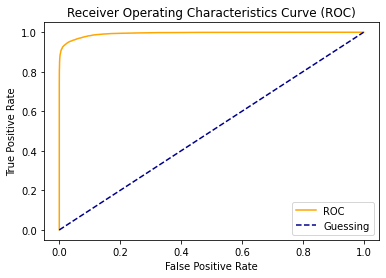

In [14]:
import matplotlib.pyplot as plt
def plot_roc(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label="Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristics Curve (ROC)")
    plt.legend()
    plt.show()
    
plot_roc(fpr,tpr)

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_positive)

0.9937066041445359

# Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[11475,   238],
       [  555,  8513]])

In [17]:
pd.crosstab(y_test,y_pred,
           rownames=["Actual Label"],
           colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,11475,238
1,555,8513


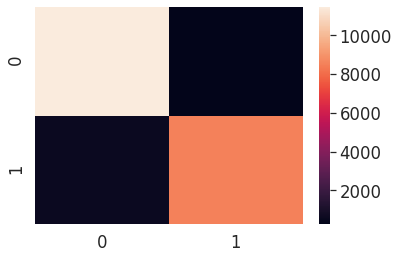

In [18]:
import seaborn as sns
sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat);

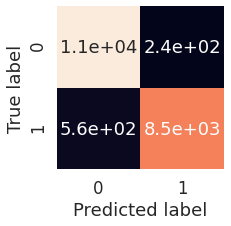

In [19]:

def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes 
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

plot_conf_mat(conf_mat)

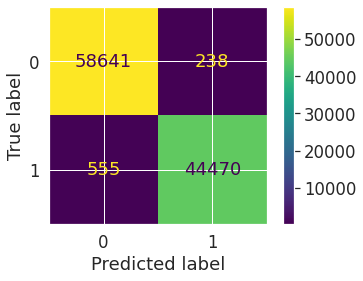

In [20]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y)

# Classification Report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [22]:
np.random.seed(42)
#Default- Mean Accuracy
cv_acc = cross_val_score(clf,X,y,cv=5)
#Cross Validated Score
print(f"The Cross Validated Accuracy : {np.mean(cv_acc)*100:.2f}%")

The Cross Validated Accuracy : 96.17%


In [23]:
np.random.seed(42)
#Accuracy Param
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
#Cross Validated Score
print(f"The Cross Validated Accuracy : {np.mean(cv_acc)*100:.2f}%")

The Cross Validated Accuracy : 96.17%


In [24]:
np.random.seed(42)
#Precision Param
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="precision")
print(f"The Cross Validated Precision : {np.mean(cv_acc)*100:.2f}%")

The Cross Validated Precision : 97.10%


In [25]:
np.random.seed(42)
#Recall Param
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="recall")
print(f"The Cross Validated Recall : {np.mean(cv_acc)*100:.2f}%")

The Cross Validated Recall : 93.96%


In [26]:
np.random.seed(42)
#F1 Param
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="f1")
print(f"The Cross Validated F1 score : {np.mean(cv_acc)*100:.2f}%")

The Cross Validated F1 score : 95.51%


# Classification Metrics

In [27]:
def classification_metrics(y_test,y_pred):
    from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
    print("Classification Metrics: ")
    print(f"Accuracy: {accuracy_score(y_test,y_pred)*100 :.2f}%")
    print(f"Precision: {precision_score(y_test,y_pred)*100 :.2f}%")
    print(f"Recall: {recall_score(y_test,y_pred)*100 :.2f}%")
    print(f"F1: {f1_score(y_test,y_pred)*100 :.2f}%")
    metric_dict = {"accuracy": round(accuracy_score(y_test,y_pred), 2),
                   "precision": round(precision_score(y_test,y_pred), 2), 
                   "recall": round(recall_score(y_test,y_pred), 2),
                   "f1": round(f1_score(y_test,y_pred), 2)}
    return metric_dict
base_metrics = classification_metrics(y_test,y_pred)

Classification Metrics: 
Accuracy: 96.18%
Precision: 97.28%
Recall: 93.88%
F1: 95.55%


In [28]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# RandomizedSearchCV for finding best Parameter

In [29]:
grid = {"n_estimators":[10,100,200,500,1000,1200],
       "max_depth":[None,5,10,20,30],
       "max_features":["auto","sqrt"],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}

In [30]:
np.random.seed(42)
clf= RandomForestClassifier(n_jobs=1)
from sklearn.model_selection import RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                   param_distributions=grid,
                   n_iter=20,
                   cv=5,
                   verbose=2)
rs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   5.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   5.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   5.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   5.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   5.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimat

In [31]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [32]:
X_testdata = airline_test.drop("satisfaction",axis=1)
y_testdata = airline_test["satisfaction"]

# Prediction on given test data

In [33]:
rs_y_preds = rs_clf.predict(X_testdata)
rs_metrics= classification_metrics(y_testdata,rs_y_preds)

Classification Metrics: 
Accuracy: 96.21%
Precision: 97.10%
Recall: 94.18%
F1: 95.62%


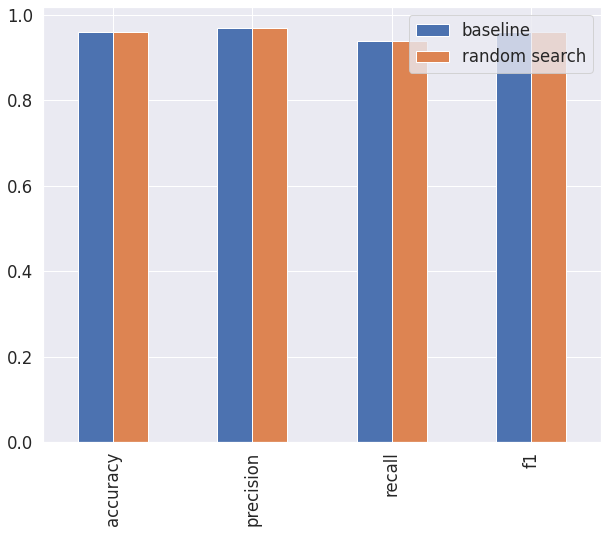

In [34]:
compare_metrics = pd.DataFrame({"baseline": base_metrics,
                                "random search": rs_metrics})
compare_metrics.plot.bar(figsize=(10, 8));